> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset -[TMDb Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>  Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

>  There are some odd charactersin the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

>  The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Questions
> Which genres are most popular from year to year?

> What kinds of properties are associated with movies that have high revenues?

In [1]:
#Import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### Data Wrangling
> Inspecting the dataset of missing values, errant values, duplicates and wrong data type

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

> Tne missing values in columns homepage, tagline, keywords and production companies are way too many, hence, they will be dropped.

In [3]:
df.drop(['homepage', 'tagline', 'keywords', 'production_companies'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   cast            10790 non-null  object 
 7   director        10822 non-null  object 
 8   overview        10862 non-null  object 
 9   runtime         10866 non-null  int64  
 10  genres          10843 non-null  object 
 11  release_date    10866 non-null  object 
 12  vote_count      10866 non-null  int64  
 13  vote_average    10866 non-null  float64
 14  release_year    10866 non-null  int64  
 15  budget_adj      10866 non-null  float64
 16  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object

In [4]:
df[df['imdb_id'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,Frank Paur,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,Sam Liu,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",NaN,As part of the ongoing celebration of their 20...,163,Music,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,Florence Foresti is offered Bercy tribute to a...,120,Comedy,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,Connor McGuire|Colin McGuire,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Mikael Salomon,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Mikael Salomon,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,1/1/07,13,7.0,2007,0.000000,0.0


> As seen above, the rows with missing imbd_id are the ones with zero budget and revenue which implies that the details were not included and the names of the directors are missing. It is just safe to drop these rows with missing values.

In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10725 non-null  int64  
 1   imdb_id         10725 non-null  object 
 2   popularity      10725 non-null  float64
 3   budget          10725 non-null  int64  
 4   revenue         10725 non-null  int64  
 5   original_title  10725 non-null  object 
 6   cast            10725 non-null  object 
 7   director        10725 non-null  object 
 8   overview        10725 non-null  object 
 9   runtime         10725 non-null  int64  
 10  genres          10725 non-null  object 
 11  release_date    10725 non-null  object 
 12  vote_count      10725 non-null  int64  
 13  vote_average    10725 non-null  float64
 14  release_year    10725 non-null  int64  
 15  budget_adj      10725 non-null  float64
 16  revenue_adj     10725 non-null  float64
dtypes: float64(4), int64(6), object

In [6]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [7]:
def f_name(col):
    df[col] = df[col].replace(0, np.nan)
    mean_1 = df[col].mean()
    df[col] = df[col].fillna(mean_1)

In [8]:
f_name('revenue_adj')

In [9]:
f_name('budget_adj')

In [10]:
f_name('runtime')

> The genres column has to be split into into multiple rows so that analysis can be more effective

In [11]:
df['new_genre'] = df['genres'].str.split('|')
df_new = df.explode('new_genre')

In [12]:
df_new.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [13]:
df_new['new_genre'].value_counts()

Drama              4744
Comedy             3774
Thriller           2902
Action             2371
Romance            1707
Horror             1636
Adventure          1463
Crime              1353
Science Fiction    1217
Family             1213
Fantasy             905
Mystery             808
Animation           662
Documentary         470
Music               398
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: new_genre, dtype: int64

### Exploratory Data Analysis

#### Question: What are the popular genres?

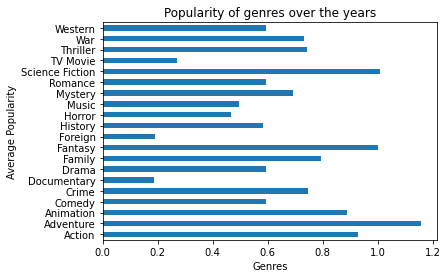

In [14]:
df_new.groupby(['new_genre'])['popularity'].mean().plot(kind='barh', title='Popularity of genres over the years')
plt.xlabel('Genres')
plt.ylabel('Average Popularity');

> According to the visual above, the most popular genre is Adventure followed by Fantasy and then Science fiction. Over the years, these genres have been the most popular.

### Question: What kinds of properties are associated with movies with high revenue?

In [15]:
df_new.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26731.000000,26731.000000,2.673100e+04,2.673100e+04,26731.000000,26731.000000,26731.000000,26731.000000,2.673100e+04,2.673100e+04
mean,58219.791628,0.710580,1.765117e+07,4.783819e+07,103.292858,251.881561,5.949613,2000.650443,3.943315e+07,1.220986e+08
std,86361.280066,1.118473,3.471786e+07,1.326921e+08,29.166996,640.352522,0.909276,12.774108,3.220392e+07,1.487817e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10179.000000,0.226718,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,2.629171e+07,5.877994e+07
50%,18032.000000,0.414316,3.000000e+04,0.000000e+00,100.000000,44.000000,6.000000,2005.000000,3.700300e+07,1.152341e+08
75%,57586.000000,0.779837,2.000000e+07,3.155546e+07,112.000000,176.000000,6.600000,2011.000000,3.700300e+07,1.152341e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [16]:
df.shape

(10724, 18)

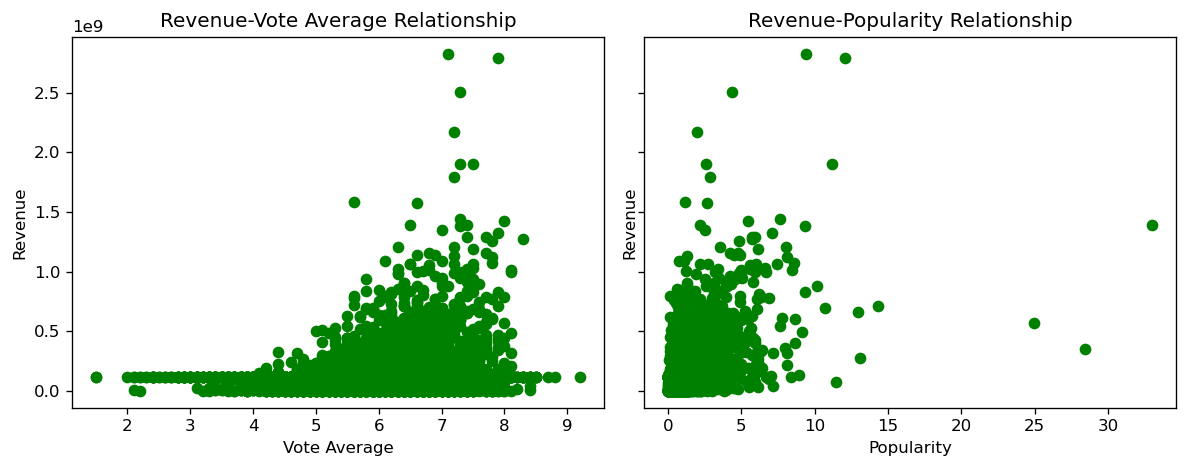

In [17]:
fig, (ax_v, ax_p) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)
ax_v.plot(df['vote_average'], df['revenue_adj'], 'go')
ax_p.plot(df['popularity'], df['revenue_adj'], 'go')
ax_v.set_title('Revenue-Vote Average Relationship'); ax_p.set_title('Revenue-Popularity Relationship')
ax_v.set_xlabel('Vote Average') ; ax_p.set_xlabel('Popularity')
ax_v.set_ylabel('Revenue') ; ax_p.set_ylabel('Revenue')
plt.tight_layout()
plt.show()

> Comparing revenue with vote average, movies with vote average of 6 to 8 have a high revenue.

> The Observation of this visual is quite negative. Comparing popularity with revenue, low values of popularity have a higher revenue than high values of popularity. This means that popularity does not necessarily correlate with a high revenue generation.

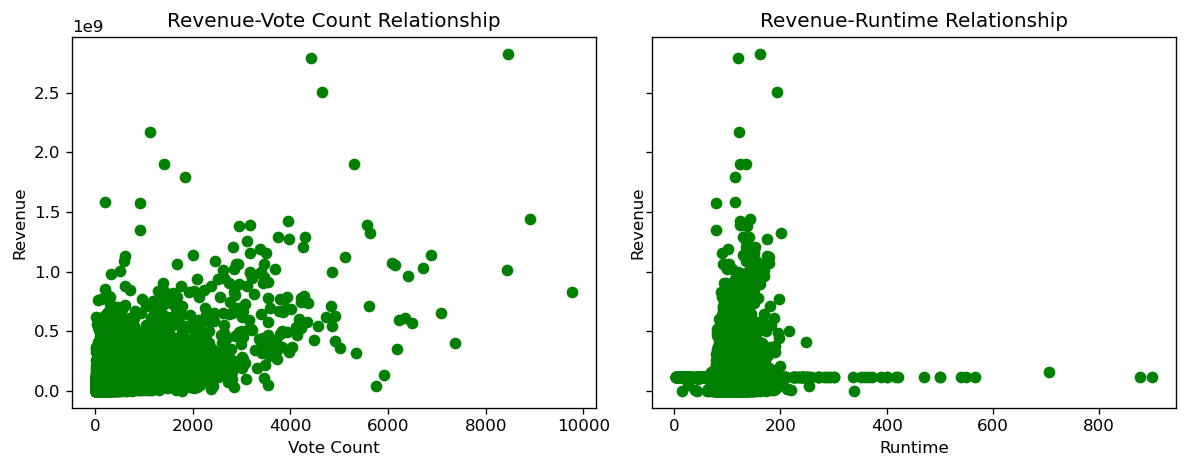

In [18]:
fig, (ax_v, ax_p) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)
ax_v.plot(df['vote_count'], df['revenue_adj'], 'go')
ax_p.plot(df['runtime'], df['revenue_adj'], 'go')
ax_v.set_title('Revenue-Vote Count Relationship'); ax_p.set_title('Revenue-Runtime Relationship')
ax_v.set_xlabel('Vote Count') ; ax_p.set_xlabel('Runtime')
ax_v.set_ylabel('Revenue') ; ax_p.set_ylabel('Revenue')
plt.tight_layout()
plt.show()

> The higher the vote count, the higher the revenue.

> Movies with runtime between 100 and 200 have higher revenue.

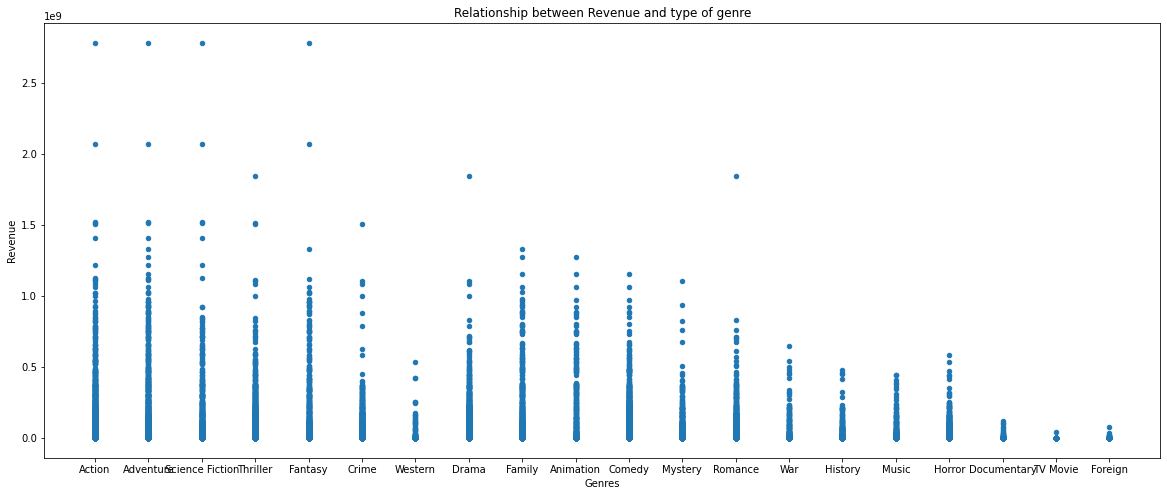

In [19]:
df_new.plot(x='new_genre', y='revenue', kind='scatter', figsize=(20,8))
plt.title('Relationship between Revenue and type of genre')
plt.xlabel('Genres')
plt.ylabel('Revenue');

> Action Adventure and Science Fiction genres are the top genres with high revenue.

## Conclusion

#### Result: Our data suggests that:

> The top three genres with high average popularity are Adventure, Fantasy and Science Fiction.

> The top three genres with high revenue are Action, Adventure and Science Fiction.

> Movies that have runtime between 100 to 200, high vote count and low values of popularity have the generation of a high revenue.

#### Limitations:
> As obtained from the data, the genre has the most effect on the revenue. However, there is a negative correlation between popularity and increased revenue generation. I do not know the metrics behind the values of the popularity.

